In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from imblearn.over_sampling import SMOTE

from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix

In [ ]:
telco=pd.read_csv('churn.csv')
telco.head()

,customerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0.0,NaN,No,1.0,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0.0,No,No,34.0,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0.0,No,No,2.0,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0.0,No,No,45.0,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0.0,No,No,2.0,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# **General Information & Data Cleaning**

In [ ]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7046 entries, 0 to 7045
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7037 non-null   object 
 1   Gender            7030 non-null   object 
 2   SeniorCitizen     7034 non-null   float64
 3   Partner           7030 non-null   object 
 4   Dependents        7027 non-null   object 
 5   Tenure            7029 non-null   float64
 6   Contract          7033 non-null   object 
 7   PaperlessBilling  7033 non-null   object 
 8   PaymentMethod     7035 non-null   object 
 9   MonthlyCharges    7036 non-null   float64
 10  TotalCharges      7046 non-null   float64
 11  Churn             7046 non-null   object 
dtypes: float64(4), object(8)
memory usage: 660.7+ KB


## Missing Values

In [ ]:
# number of missing value per column
telco.isna().sum()

customerID           9
Gender              16
SeniorCitizen       12
Partner             16
Dependents          19
Tenure              17
Contract            13
PaperlessBilling    13
PaymentMethod       11
MonthlyCharges      10
TotalCharges         0
Churn                0
dtype: int64

In [ ]:
# percentage version
telco.isna().sum() * 100 / len(telco)

customerID          0.127732
Gender              0.227079
SeniorCitizen       0.170309
Partner             0.227079
Dependents          0.269657
Tenure              0.241272
Contract            0.184502
PaperlessBilling    0.184502
PaymentMethod       0.156117
MonthlyCharges      0.141924
TotalCharges        0.000000
Churn               0.000000
dtype: float64

In [ ]:
# portion missing values considering all column
((telco.shape[0] - telco.dropna().shape[0])/telco.shape[0])*100

1.9159806982685212

### Since number of rows with missing values are relatively small, we can simply drop them (simple, yet the best option)

## Drop Missing Values

In [ ]:
telco = telco.dropna()

In [ ]:
telco.isna().sum()

customerID          0
Gender              0
SeniorCitizen       0
Partner             0
Dependents          0
Tenure              0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6911 entries, 1 to 7045
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        6911 non-null   object 
 1   Gender            6911 non-null   object 
 2   SeniorCitizen     6911 non-null   float64
 3   Partner           6911 non-null   object 
 4   Dependents        6911 non-null   object 
 5   Tenure            6911 non-null   float64
 6   Contract          6911 non-null   object 
 7   PaperlessBilling  6911 non-null   object 
 8   PaymentMethod     6911 non-null   object 
 9   MonthlyCharges    6911 non-null   float64
 10  TotalCharges      6911 non-null   float64
 11  Churn             6911 non-null   object 
dtypes: float64(4), object(8)
memory usage: 701.9+ KB


## Success removing null values!

## Duplicates

In [ ]:
telco.duplicated().sum()

13

### There are 13 duplicated rows and will be dropped later

## Drop Duplicates Data

In [ ]:
telco = telco.drop_duplicates()

In [ ]:
telco.duplicated().sum()

0

### Duplicated rows have gone!

# **Handle Categorical Data**

In [ ]:
## customerID di drop karena tidak berpengaruh terhadap churn

telco.drop(columns=["customerID"], inplace=True)

In [ ]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6898 entries, 1 to 7031
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Gender            6898 non-null   object 
 1   SeniorCitizen     6898 non-null   float64
 2   Partner           6898 non-null   object 
 3   Dependents        6898 non-null   object 
 4   Tenure            6898 non-null   float64
 5   Contract          6898 non-null   object 
 6   PaperlessBilling  6898 non-null   object 
 7   PaymentMethod     6898 non-null   object 
 8   MonthlyCharges    6898 non-null   float64
 9   TotalCharges      6898 non-null   float64
 10  Churn             6898 non-null   object 
dtypes: float64(4), object(7)
memory usage: 646.7+ KB


In [ ]:
cols = ['Gender', 'SeniorCitizen', 'Partner', 'Dependents', 'Tenure', 'Contract',
        'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']
for col in cols:
  print(f'Value counts of {col} column')
  print(telco[col].value_counts(), '\n')

Value counts of Gender column
Male      3488
Female    3410
Name: Gender, dtype: int64 

Value counts of SeniorCitizen column
0.0    5781
1.0    1117
Name: SeniorCitizen, dtype: int64 

Value counts of Partner column
No     3573
Yes    3325
Name: Partner, dtype: int64 

Value counts of Dependents column
No     4845
Yes    2053
Name: Dependents, dtype: int64 

Value counts of Tenure column
1.0     601
72.0    349
2.0     230
3.0     196
4.0     171
       ... 
59.0     58
28.0     57
39.0     55
44.0     50
36.0     47
Name: Tenure, Length: 72, dtype: int64 

Value counts of Contract column
Month-to-month    3803
Two year          1653
One year          1442
Name: Contract, dtype: int64 

Value counts of PaperlessBilling column
Yes    4088
No     2810
Name: PaperlessBilling, dtype: int64 

Value counts of PaymentMethod column
Electronic check             2309
Mailed check                 1581
Bank transfer (automatic)    1514
Credit card (automatic)      1494
Name: PaymentMethod, dtype:

## One hot encoding

In [ ]:
telco=pd.get_dummies(telco, columns=['PaymentMethod', 'Contract'])

In [ ]:
telco.head(3)

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract_Month-to-month,Contract_One year,Contract_Two year
1,Male,0.0,No,No,34.0,No,56.95,1889.50,No,0,0,0,1,0,1,0
2,Male,0.0,No,No,2.0,Yes,53.85,108.15,Yes,0,0,0,1,1,0,0
3,Male,0.0,No,No,45.0,No,42.30,1840.75,No,1,0,0,0,0,1,0


In [ ]:
telco['Churn']=telco['Churn'].replace("No", 0).replace("Yes", 1)
telco['Partner']=telco['Partner'].replace("No", 0).replace("Yes", 1)
telco['Dependents']=telco['Dependents'].replace("No", 0).replace("Yes", 1)
telco['Gender']=telco['Gender'].replace("Female", 0).replace("Male", 1)
telco['PaperlessBilling']=telco['PaperlessBilling'].replace("No", 0).replace("Yes", 1)

In [ ]:
telco.head(3)

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract_Month-to-month,Contract_One year,Contract_Two year
1,1,0.0,0,0,34.0,0,56.95,1889.50,0,0,0,0,1,0,1,0
2,1,0.0,0,0,2.0,1,53.85,108.15,1,0,0,0,1,1,0,0
3,1,0.0,0,0,45.0,0,42.30,1840.75,0,1,0,0,0,0,1,0


In [ ]:

telco['SeniorCitizen']=telco['SeniorCitizen'].astype(int)

In [ ]:
telco.head(3)

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract_Month-to-month,Contract_One year,Contract_Two year
1,1,0,0,0,34.0,0,56.95,1889.50,0,0,0,0,1,0,1,0
2,1,0,0,0,2.0,1,53.85,108.15,1,0,0,0,1,1,0,0
3,1,0,0,0,45.0,0,42.30,1840.75,0,1,0,0,0,0,1,0


In [ ]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6898 entries, 1 to 7031
Data columns (total 16 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Gender                                   6898 non-null   int64  
 1   SeniorCitizen                            6898 non-null   int64  
 2   Partner                                  6898 non-null   int64  
 3   Dependents                               6898 non-null   int64  
 4   Tenure                                   6898 non-null   float64
 5   PaperlessBilling                         6898 non-null   int64  
 6   MonthlyCharges                           6898 non-null   float64
 7   TotalCharges                             6898 non-null   float64
 8   Churn                                    6898 non-null   int64  
 9   PaymentMethod_Bank transfer (automatic)  6898 non-null   uint8  
 10  PaymentMethod_Credit card (automatic)    6898 no

# **Split The Data**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## X = feature
## y = target
X = telco.drop(columns='Churn')
y = telco[['Churn']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# **Multicollinearity**


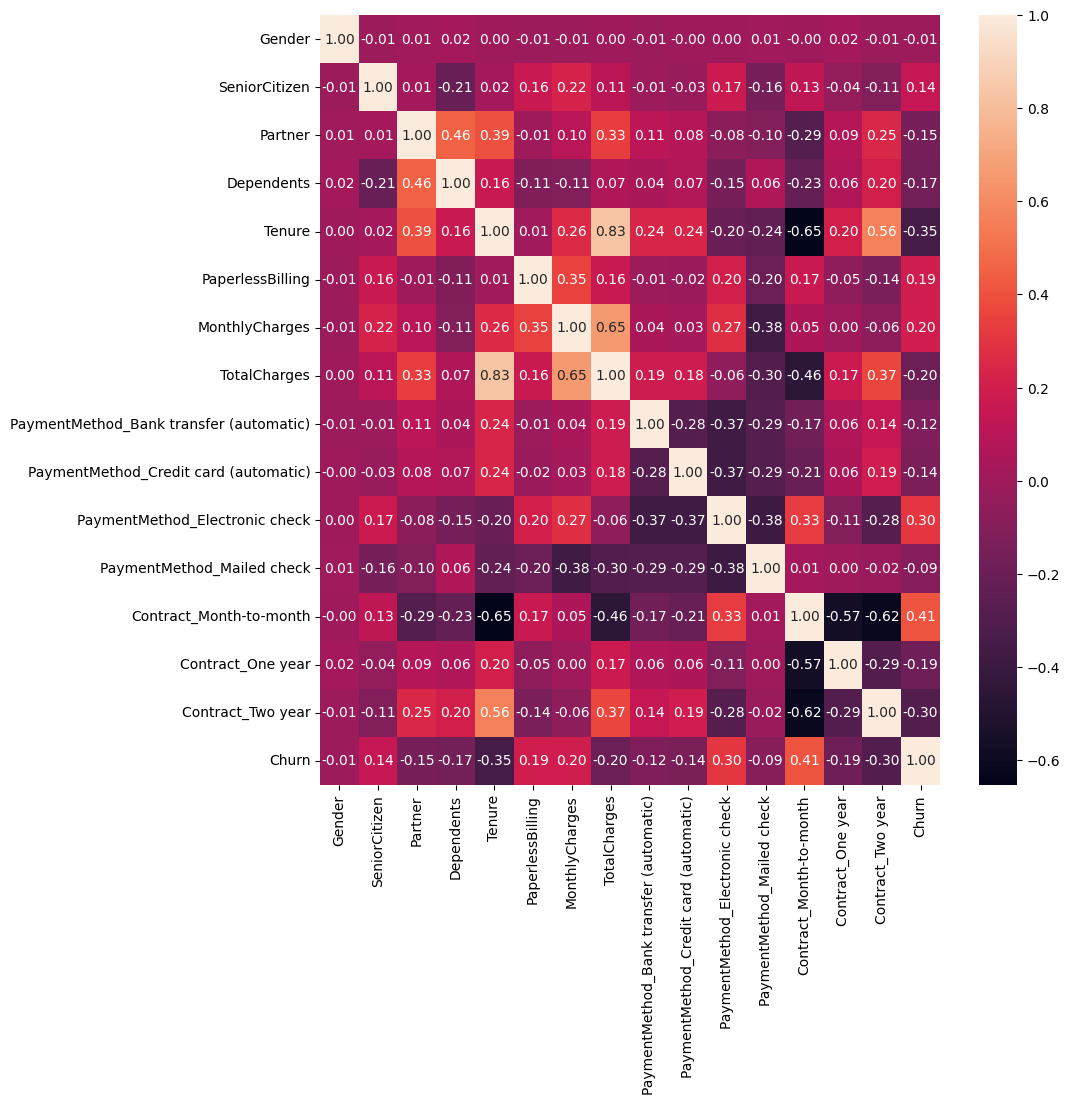

In [ ]:
admit_train = pd.concat([X_train, y_train], axis=1)
corr = admit_train.corr()

plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, fmt='.2f')
plt.show()


## Observation :
*   the threshold is at least 0.8
*   tenure and total charges are highly correlated each other







In [ ]:
X_train = X_train.drop(columns=['Tenure', 'TotalCharges'])
X_test = X_test.drop(columns=['Tenure', 'TotalCharges'])

# **Modeling**

## **K-NN Classification**

In [ ]:
# split the data
from sklearn.model_selection import train_test_split

X = telco.drop(columns='Churn').to_numpy()
y = telco[['Churn']].to_numpy()
y = y.reshape(len(y),) # sklean formatting

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
# It's important to choose the right metric when doing classification
telco['Churn'].value_counts()

0    5073
1    1825
Name: Churn, dtype: int64

In [ ]:
# define the estimator/model
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()

In [ ]:
# hyperparameter tuning
from sklearn.model_selection import GridSearchCV

parameters = {
    'n_neighbors': (2,3,4,5,6,7,8)
}

knn_clf_gridcv = GridSearchCV(knn_clf, parameters, cv=5, scoring='recall')
knn_clf_gridcv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': (2, 3, 4, 5, 6, 7, 8)},
             scoring='recall')

In [ ]:
# the compact results
cv_result = pd.DataFrame(knn_clf_gridcv.cv_results_)
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result[retain_cols]

,params,mean_test_score,rank_test_score
0,{'n_neighbors': 2},0.278746,7
1,{'n_neighbors': 3},0.464808,1
2,{'n_neighbors': 4},0.337979,6
3,{'n_neighbors': 5},0.455749,2
4,{'n_neighbors': 6},0.363763,4
5,{'n_neighbors': 7},0.442509,3
6,{'n_neighbors': 8},0.354007,5


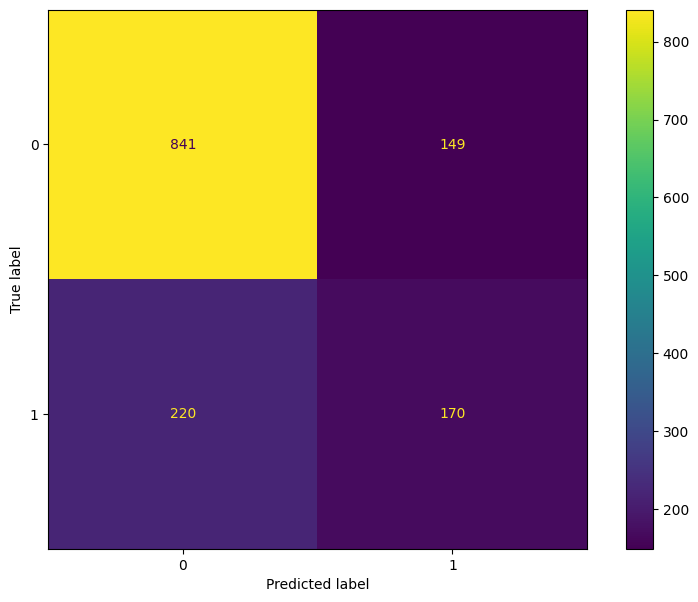

In [ ]:
# plotting confusion matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(10,7))
y_pred = knn_clf_gridcv.best_estimator_.predict(X_test)

cm = confusion_matrix(y_test, y_pred, labels=knn_clf_gridcv.best_estimator_.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=knn_clf_gridcv.best_estimator_.classes_)
disp.plot(ax=ax)
plt.show()

# **Metric Evaluation**

In [ ]:
from sklearn.metrics import confusion_matrix, roc_auc_score, f1_score, recall_score

### The class distribution is imbalance, then we can't use `accuracy`. we can still use another metric evaluation such as `recall`(sensitivity) to detect data that is actually churn

In [ ]:
print('KNN Classification recall score',recall_score(y_test, y_pred))

KNN Classification recall score 0.4358974358974359


In [ ]:
# classification report
from sklearn.metrics import classification_report
y_pred = knn_clf_gridcv.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.85      0.82       990
           1       0.53      0.44      0.48       390

    accuracy                           0.73      1380
   macro avg       0.66      0.64      0.65      1380
weighted avg       0.72      0.73      0.72      1380



### The recall score on test data is only 0.44

## **Random Forest**

In [ ]:
# split the data
from sklearn.model_selection import train_test_split

X = telco.drop(columns='Churn').to_numpy()
y = telco[['Churn']].to_numpy()
y = y.reshape(len(y),) # sklean formatting

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
# define random forest classifier model
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=42)

In [ ]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'n_estimators': (10,20,30,40,50),
    'max_depth':(1,2,3,4,5)
}

# note: we use recall
rf_clf_gridcv = GridSearchCV(rf_clf, parameters, cv=5, scoring='recall')
rf_clf_gridcv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': (1, 2, 3, 4, 5),
                         'n_estimators': (10, 20, 30, 40, 50)},
             scoring='recall')

In [ ]:
# the results
cv_result = pd.DataFrame(rf_clf_gridcv.cv_results_)
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result[retain_cols].sort_values('rank_test_score')

,params,mean_test_score,rank_test_score
20,"{'max_depth': 5, 'n_estimators': 10}",0.408362,1
21,"{'max_depth': 5, 'n_estimators': 20}",0.398606,2
23,"{'max_depth': 5, 'n_estimators': 40}",0.386063,3
22,"{'max_depth': 5, 'n_estimators': 30}",0.385366,4
24,"{'max_depth': 5, 'n_estimators': 50}",0.383972,5
15,"{'max_depth': 4, 'n_estimators': 10}",0.344251,6
16,"{'max_depth': 4, 'n_estimators': 20}",0.341463,7
19,"{'max_depth': 4, 'n_estimators': 50}",0.339373,8
18,"{'max_depth': 4, 'n_estimators': 40}",0.339373,8
17,"{'max_depth': 4, 'n_estimators': 30}",0.338676,10


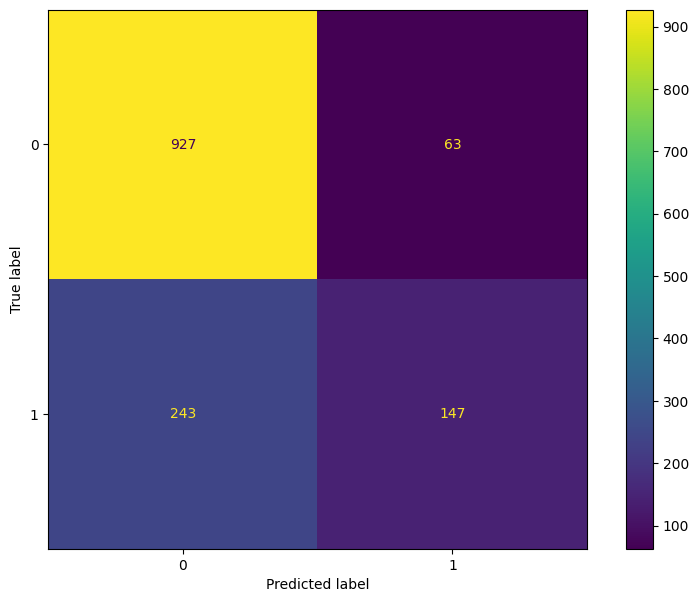

In [ ]:
# the confusion matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(10,7))
y_pred = rf_clf_gridcv.best_estimator_.predict(X_test)

cm = confusion_matrix(y_test, y_pred, labels=rf_clf_gridcv.best_estimator_.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=rf_clf_gridcv.best_estimator_.classes_)
disp.plot(ax=ax)
plt.show()

# **Metric Evaluation**

In [ ]:
from sklearn.metrics import confusion_matrix, roc_auc_score, f1_score, recall_score

### The class distribution is imbalance, then we can't use `accuracy`. we can still use another metric evaluation such as `recall`(sensitivity) to detect data that is actually churn

In [ ]:
print('recall score',recall_score(y_test, y_pred))

recall score 0.3769230769230769


In [ ]:
# classification report
from sklearn.metrics import classification_report
y_pred = rf_clf_gridcv.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.94      0.86       990
           1       0.70      0.38      0.49       390

    accuracy                           0.78      1380
   macro avg       0.75      0.66      0.67      1380
weighted avg       0.77      0.78      0.75      1380



### The recall score on test data is decreased to 0.38

## **Conclusion** :


*   the datasets has imbalance data
*   because the datasets are imbalance, then we can't use `accuracy`. we can still use another metric evaluation such as `recall`(sensitivity) to detect data that is actually positive churn
*   from of all the modeling that has been tested. We can see that KNN model is better than Random Forest model




